In [2]:
# install yahoo finance and other modules if not installed before
#%pip install yfinance
#%pip install matplotlib

[*********************100%***********************]  3 of 3 completed


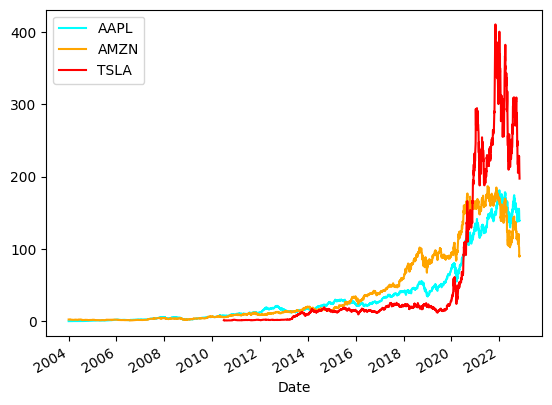

In [7]:
import yfinance as yf  
import matplotlib.pyplot as plt
from datetime import datetime

# Get the stock data specifying the stock ticker, start date, and end date
startDate = '2004-01-01'
endDate = datetime.today().strftime('%Y-%m-%d')
data = yf.download(['TSLA', 'AMZN', 'AAPL'], startDate, endDate)

# Plot the adjusted close prices
prices = data["Adj Close"]
ax = prices.plot.line(color={'AAPL': 'cyan', 'AMZN': 'orange', 'TSLA': 'red'})

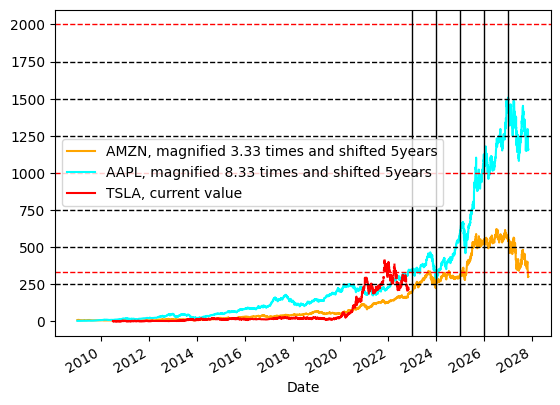

In [13]:
import pandas as pd
from pandas.tseries.offsets import DateOffset

# Seperate stock data
amazon = prices["AMZN"]
apple = prices["AAPL"]
tesla = prices["TSLA"]
tesla.name = "TSLA, current value"

# Amazon: Offset back in X years
offsetByYears = 5
magnifyBy = 3.33
amazonModName = "AMZN, magnified " + str(magnifyBy) + " times and shifted " + str(offsetByYears) + "years"
amazonMod = pd.Series(data = amazon.values * magnifyBy, index = amazon.index + DateOffset(years=offsetByYears), name = amazonModName)

# Apple: Offset back in X years
offsetByYears = 5
magnifyBy = 8.33
appleModName = "AAPL, magnified " + str(magnifyBy) + " times and shifted " + str(offsetByYears) + "years"
appleMod = pd.Series(data = apple.values * magnifyBy, index = apple.index + DateOffset(years=offsetByYears), name = appleModName)

# Combine all back
a = pd.DataFrame(amazonMod)
b = a.join(appleMod)
compare = b.join(tesla)
ax = compare.plot.line(color={appleModName: "cyan", amazonModName: "orange", tesla.name: "red"})

# Draw lines for target sells
plt.axhline(333, color='red', linestyle='--', lw=1)
plt.axhline(1000, color='red', linestyle='--', lw=1)
plt.axhline(2000, color='red', linestyle='--', lw=1)

# Draw lines for intermediate price points
plt.axhline(250, color='black', linestyle='--', lw=1)
plt.axhline(500, color='black', linestyle='--', lw=1)
plt.axhline(750, color='black', linestyle='--', lw=1)
plt.axhline(1250, color='black', linestyle='--', lw=1)
plt.axhline(1500, color='black', linestyle='--', lw=1)
plt.axhline(1750, color='black', linestyle='--', lw=1)

# Draw line for years
plt.axvline('2023-01-01', color='black', lw=1)
plt.axvline('2024-01-01', color='black', lw=1)
plt.axvline('2025-01-01', color='black', lw=1)
plt.axvline('2026-01-01', color='black', lw=1)
plt.axvline('2027-01-01', color='black', lw=1)

# Plot and print to pdf and jpg
plt.savefig('TSLAonAMZNAPPL_in' + str(offsetByYears) + 'years@' + endDate + '.pdf', dpi=300, bbox_inches='tight')
plt.savefig('TSLAonAMZNAPPL_in' + str(offsetByYears) + 'years@' + endDate + '.png')

In [12]:
# For Excel export, first install openpyxl if not previously
#%pip install openpyxl

# import openpyxl
compare.to_excel('TSLAonAMZNAPPL_in' + str(offsetByYears) + 'years@' + endDate + '.xlsx')